Основы работы с conda

conda — это менеджер пакетов и окружений, который часто используется в Data Science и MLOps для управления зависимостями и изоляции проектов.

Если у тебя еще не установлен conda, ты можешь установить его, скачав Miniconda #[https://docs.conda.io/en/latest/miniconda.html] или Anaconda [https://www.anaconda.com/download].

## Основные команды conda
### 1. Создание нового окружения:
conda create --name test_env python=3.10
### 2. Активация окружения:
conda activate myenv
### 3. Деактивация окружения:
conda deactivate
### 4. Установка пакетов:
conda install numpy pandas
### 5. Удаление пакетов:
conda remove numpy
### 6. Экспорт окружения в файл:
conda env export > environment.yml

In [1]:
!ver


Microsoft Windows [Version 10.0.19045.5371]


In [2]:
#Пример получения списка установленный пакетов в системе и запись в файл list_libs.yml
!conda list > list_libs.yml

In [3]:
#Вывод списка библиотек из файла начинающихся на "n"
!findstr "^n" list_libs.yml

nbclient                  0.8.0           py312haa95532_0  
nbconvert                 7.10.0          py312haa95532_0  
nbformat                  5.9.2           py312haa95532_0  
nest-asyncio              1.6.0           py312haa95532_0  
networkx                  3.4.2                    pypi_0    pypi
notebook-shim             0.2.3           py312haa95532_0  
numexpr                   2.8.7           py312h96b7d27_0  
numpy                     1.26.4          py312hfd52020_0  
numpy-base                1.26.4          py312h4dde369_0  


## Основные команды pip

In [4]:
!pip list 

Package                   Version
------------------------- ------------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.2
bleach                    4.1.0
Bottleneck                1.3.7
Brotli                    1.0.9
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.0
cycler                    0.11.0
Cython                    3.0.10
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
executing                 0.8.3
fastjsonschema            2.16.2
filelock                  3.17.0
fonttools                 4.25.0
fsspec                    2025.2.0
idna                      3.4
ipykernel       

In [5]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [6]:
!wmic cpu get name, numberofcores, numberoflogicalprocessors

Name                                       NumberOfCores  NumberOfLogicalProcessors  

Intel(R) Core(TM) i5-10300H CPU @ 2.50GHz  4              8                          





### Библиотека Pytorch
PyTorch — это библиотека для машинного обучения, предназначенная для построения архитектур нейронных сетей и обучения.

In [7]:
import torch

In [8]:
a = torch.tensor([1.,2,3])
b = torch.tensor([3,-2,1])
c = a + b
c

tensor([4., 0., 4.])

In [9]:
torch.cuda.is_available()

False

In [10]:
a = torch.tensor([1.,2,3], requires_grad=True)
b = a + 2
c = a * a * 2
c = c.mean()
c.backward()  # Вычисляет градиенты
print(a.grad)

tensor([1.3333, 2.6667, 4.0000])


### Пример обучения нейронной сети для изображений

In [11]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

#Пример построения графа нейросети с полносвязнными слоями
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (B, C, H, W) -> (B, embed_dim, H/patch_size, W/patch_size)
        x = x.flatten(2)  # (B, embed_dim, H/patch_size * W/patch_size)
        x = x.transpose(1, 2)  # (B, H/patch_size * W/patch_size, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.query_linear = nn.Linear(embed_dim, embed_dim)
        self.key_linear = nn.Linear(embed_dim, embed_dim)
        self.value_linear = nn.Linear(embed_dim, embed_dim)
        self.out_linear = nn.Linear(embed_dim, embed_dim)

    def attention(self, query, key, value, mask=None):
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attn = F.softmax(scores, dim=-1)
        context = torch.matmul(attn, value)
        return context, attn

    def forward(self, x):
        batch_size = x.size(0)

        query = self.query_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = self.key_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = self.value_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        context, _ = self.attention(query, key, value)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.embed_dim)
        return self.out_linear(context)

class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim, dropout=0.1):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(embed_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.linear2(self.dropout(F.relu(self.linear1(x))))

class TransformerLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super(TransformerLayer, self).__init__()
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.ff = FeedForward(embed_dim, hidden_dim, dropout)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output = self.attn(x)
        out1 = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(out1)
        out2 = self.norm2(out1 + self.dropout(ff_output))
        return out2

class VisionTransformer(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        self.layers = nn.ModuleList([
            TransformerLayer(embed_dim, num_heads, hidden_dim, dropout)
            for _ in range(num_layers)
        ])
        self.linear = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        for layer in self.layers:
            x = layer(x)
        x = x.mean(dim=1)  # Усреднение по последовательности
        return self.linear(x)

# Пример использования
img_size = 28
patch_size = 8
in_channels = 1  # Для черно-белых изображений
embed_dim = 14
num_heads = 2
hidden_dim = 6
num_layers = 1
num_classes = 10  # Например, для классификации цифр от 0 до 9
dropout = 0.1

model = VisionTransformer(img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout)

# Пример входных данных
x = torch.rand(1, in_channels, img_size, img_size)  # Батч из 32 изображений размером 28x28

output = model(x)
print(output.shape)  # Выходной тензор

torch.Size([1, 10])


In [13]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = MNIST('../data', train=True, download=True,
                   transform=transform)
dataset2 = MNIST('../data', train=False,
                   transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,)
test_loader = torch.utils.data.DataLoader(dataset2)

In [14]:
inputs, labels = next(iter(train_loader)) 
print(inputs.shape, labels.shape)

torch.Size([1, 1, 28, 28]) torch.Size([1])


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [16]:
for epoch in tqdm(range(15)):  # Количество эпох
    correct = 0
    for data in test_loader:  # Итерация по данным
        inputs, labels = data
        optimizer.zero_grad()  # Обнуление градиентов
        outputs = model(inputs)  # Прямой проход
        loss = criterion(outputs, labels)  # Вычисление потерь
        
        loss.backward()  # Обратный проход
        optimizer.step()  # Обновление весов
        pred = outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(labels).item()
    print('Accuracy: {:.0f}%)\n'.format(correct/len(test_loader)*100))

  7%|█████▌                                                                             | 1/15 [00:27<06:23, 27.36s/it]

Accuracy: 41%)



 13%|███████████                                                                        | 2/15 [00:53<05:44, 26.52s/it]

Accuracy: 36%)



 20%|████████████████▌                                                                  | 3/15 [01:19<05:15, 26.32s/it]

Accuracy: 36%)



 27%|██████████████████████▏                                                            | 4/15 [01:45<04:48, 26.22s/it]

Accuracy: 40%)



 33%|███████████████████████████▋                                                       | 5/15 [02:11<04:22, 26.23s/it]

Accuracy: 44%)



 40%|█████████████████████████████████▏                                                 | 6/15 [02:38<03:56, 26.30s/it]

Accuracy: 46%)



 47%|██████████████████████████████████████▋                                            | 7/15 [03:05<03:33, 26.64s/it]

Accuracy: 39%)



 53%|████████████████████████████████████████████▎                                      | 8/15 [03:36<03:16, 28.11s/it]

Accuracy: 35%)



 60%|█████████████████████████████████████████████████▊                                 | 9/15 [04:07<02:53, 28.95s/it]

Accuracy: 39%)



 67%|██████████████████████████████████████████████████████▋                           | 10/15 [04:46<02:40, 32.08s/it]

Accuracy: 42%)



 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [05:26<02:17, 34.47s/it]

Accuracy: 42%)



 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [05:58<01:41, 33.83s/it]

Accuracy: 44%)



 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [06:32<01:07, 33.71s/it]

Accuracy: 45%)



 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [07:07<00:34, 34.31s/it]

Accuracy: 46%)



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [07:44<00:00, 30.97s/it]

Accuracy: 47%)



In [17]:
number = 100
test_img, test_label = test_loader.dataset[number]
test_img = test_img.unsqueeze(0)
torch.argmax(model(test_img)), test_label

(tensor(6), 6)

In [18]:
#посмотрим как модель предсказывает цифры
for number in range(15):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    print(f"Pred = {torch.argmax(model(test_img))}, Label = {test_label}")

Pred = 7, Label = 7
Pred = 6, Label = 2
Pred = 1, Label = 1
Pred = 6, Label = 0
Pred = 7, Label = 4
Pred = 1, Label = 1
Pred = 0, Label = 4
Pred = 9, Label = 9
Pred = 6, Label = 5
Pred = 4, Label = 9
Pred = 3, Label = 0
Pred = 6, Label = 6
Pred = 4, Label = 9
Pred = 7, Label = 0
Pred = 1, Label = 1


## Визуализация прогнозов модели

NameError: name 'test_loader' is not defined

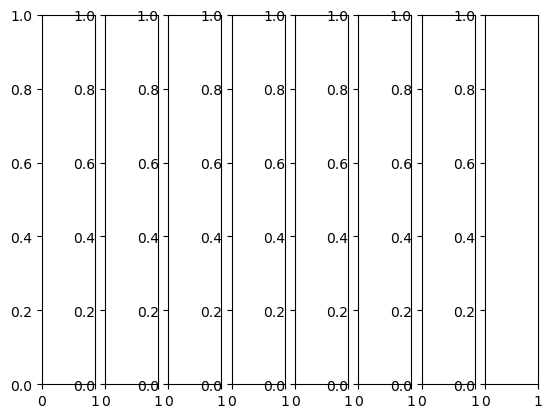

In [12]:
#У меня на этой клетке отключается ядро, так что не получается её выполнить
fig, ax = plt.subplots(1,8)
for number in range(8):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    pred = torch.argmax(model(test_img))
    ax[number].imshow(test_img[0][0].numpy())
    ax[number].set_title(f"P = {pred}")

### Обучение модели линеной регрессии

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
#В качестве набора данных используется история продаж автомобилей. Для целевой переменной используем Price(euro) - стоимость авто

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [4]:

cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']

question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)
# Анализ и очистка данных
# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
# Разделение данных на признаки и целевую переменную


# Предварительная обработка категориальных данных
# Порядковое кодирование. Обучение, трансформация и упаковка в df

ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns=cat_columns)
df[cat_columns] = df_ordinal[cat_columns]

In [5]:
X,y = df.drop(columns = ['Price(euro)']), df['Price(euro)']
scaler = StandardScaler()
power_trans = PowerTransformer()
X_scale = scaler.fit_transform(X.values)

Y_scale = power_trans.fit_transform(y.values.reshape(-1,1))

In [6]:
features_names = X.columns.to_list()

In [7]:
# разбиваем на тестовую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_scale, Y_scale,
                                                  test_size=0.3,
                                                  random_state=42)

### Обучение линейной регрессии

In [8]:
model = SGDRegressor()
model.fit(X_train, y_train)
r = model.score(X_train, y_train)
print('R^2 = ', r) # Метрика R^2

R^2 =  0.709000034399146


C:\Users\333\anaconda3\envs\numpy\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Оценим ошибку модели

In [9]:
y_pred = model.predict(X_val)
y_price = power_trans.inverse_transform(y_pred.reshape(-1,1))
print("Средняя ошибка прогноза модели =", root_mean_squared_error(power_trans.inverse_transform(y_val.reshape(-1,1)), y_price))

Средняя ошибка прогноза модели = 5782.385548826986


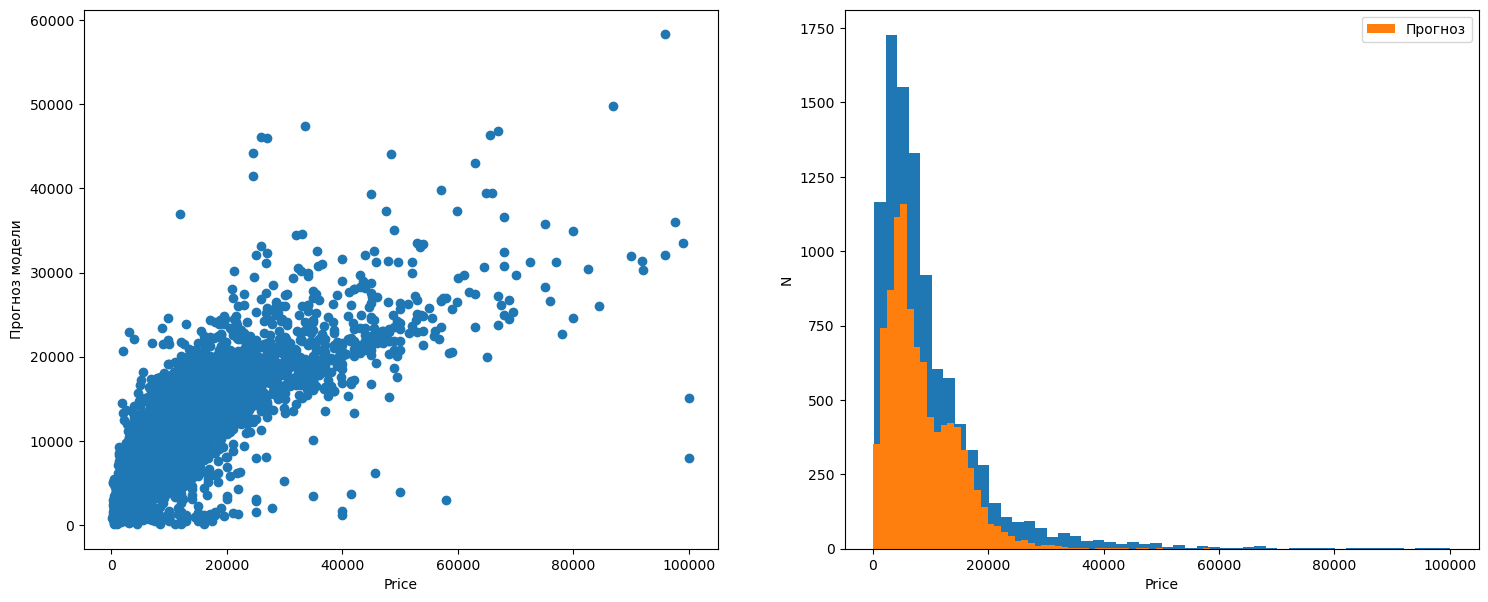

In [10]:
y = power_trans.inverse_transform(y_val.reshape(-1,1))
fig,ax = plt.subplots(1,2, dpi = 100, figsize=(18,7))
ax[0].scatter( y, y_price,)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Прогноз модели')

ax[1].hist( y,50)
ax[1].hist( y_price,50, label='Прогноз')

ax[1].set_xlabel('Price')
ax[1].set_ylabel('N')
ax[1].legend()

In [ ]:
##Сохраним модель
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model, file)

### Задание. Лабораторная работа №1

1.Выполнить установку и настройку необходимых библитек для работы с ML. Выполнить ячейки ноутбука (5 баллов)

2.Произвести обучение одной модели (Нейронной сети или линейнойной регрессии) (5 баллов)

За обучение модели на своих данных +5 баллов 

In [ ]:
# В качестве данных для обучения выбрал датасет с соревнования на Kaggle 'Regression of Used Car Prices'
# Использовать буду линейную регрессию 

# Работу выполнил Владислав Калашников (АТ-01)

# Импорт необходимых библиотек

In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

import pickle

# Подготовка данных

In [ ]:
cars = pd.read_csv('https://raw.githubusercontent.com/cybertabyretka/PMO_Datasets/main/train.csv')
cars.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [5]:
cars.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [6]:
cars = cars.drop(columns=['id'])

In [7]:
cars.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [ ]:
# Проверяю влияние различных столбцов на цену

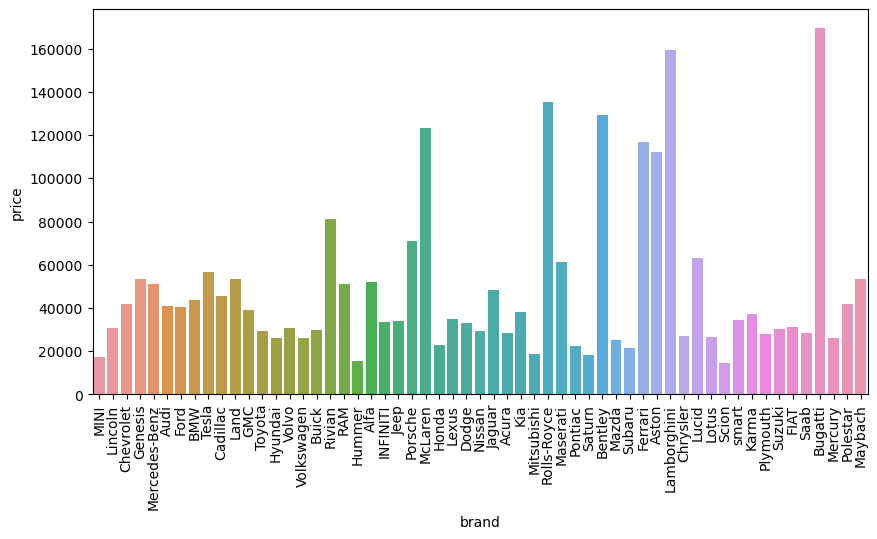

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x='brand', y='price', data=cars, errorbar=None)
plt.xticks(rotation=90)
plt.show()

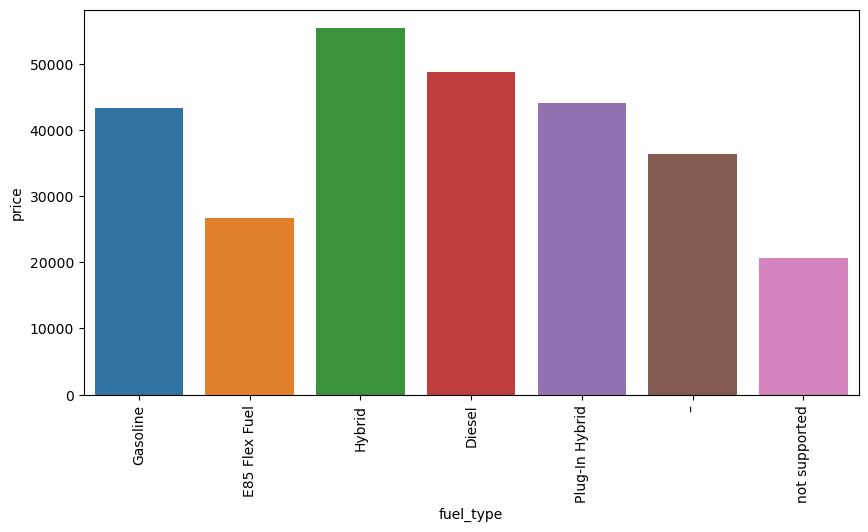

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='fuel_type', y='price', data=cars, errorbar=None)
plt.xticks(rotation=90)
plt.show()

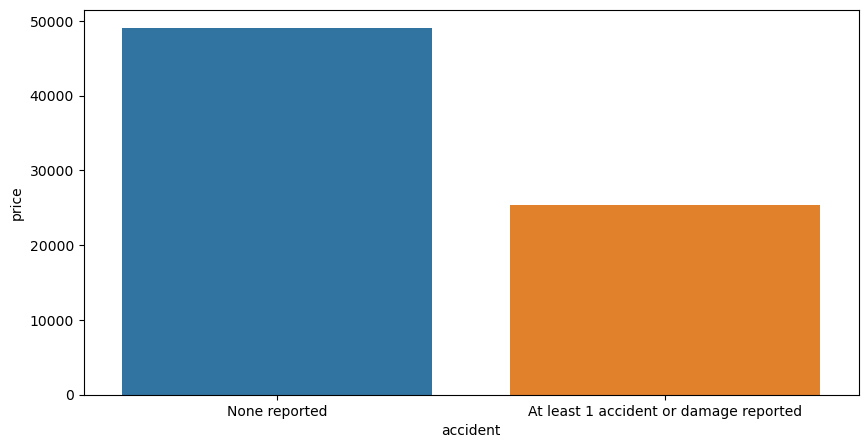

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x='accident', y='price', data=cars, errorbar=None)
plt.show()

In [ ]:
# Избавляюсь от строк с пропущенными значениями

In [12]:
cars_clear = cars.dropna(subset=('accident', 'fuel_type'))

In [13]:
cars_clear.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title     18457
price               0
dtype: int64

In [14]:
cars_clear.loc[cars_clear['clean_title'] != 'Yes', 'clean_title'] = 'No'

In [15]:
cars_clear.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [ ]:
# Перевожу строки в int

In [16]:
ordinal = OrdinalEncoder()
ordinal.fit(cars_clear);
ordinal_encoded = ordinal.transform(cars_clear)
cars_clear = pd.DataFrame(ordinal_encoded, columns=cars_clear.columns)

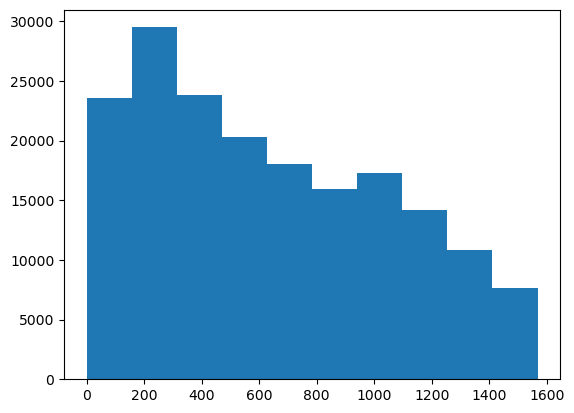

In [17]:
x, y = cars_clear.drop(columns = ['price']), cars_clear['price']

plt.hist(y)

scaler = StandardScaler()
power_trans = PowerTransformer()
X_scale = scaler.fit_transform(x.values)

Y_scale = power_trans.fit_transform(y.values.reshape(-1,1))

(array([ 2452.,  8038., 14569., 20769., 23552., 24701., 21946., 24389.,
        24140., 16511.]),
 array([-2.46842279, -2.04421396, -1.62000512, -1.19579629, -0.77158746,
        -0.34737863,  0.0768302 ,  0.50103903,  0.92524787,  1.3494567 ,
         1.77366553]),
 <BarContainer object of 10 artists>)

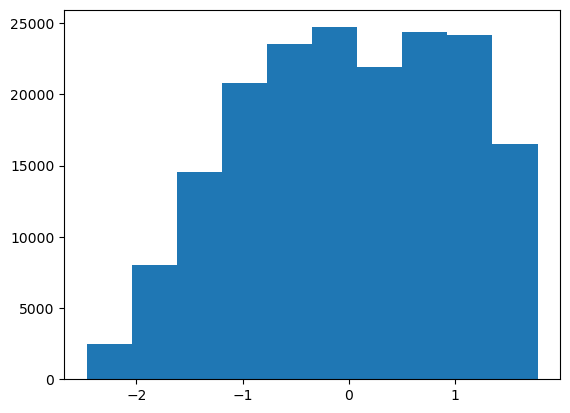

In [18]:
plt.hist(Y_scale)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_scale,
                                                    test_size=0.3,
                                                    random_state=42)

# Обучение модели

In [20]:
SGDRegressor_parameters = {
    'max_iter': 10000,
    'verbose': 3,
    'random_state': 42
}

In [21]:
model = SGDRegressor(**SGDRegressor_parameters)
model.fit(X_train, y_train)
r = model.score(X_train, y_train)
print('R^2 = ', r)

-- Epoch 1
Norm: 0.59, NNZs: 11, Bias: -0.004488, T: 126746, Avg. loss: 0.166414
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 11, Bias: 0.000934, T: 253492, Avg. loss: 0.165991
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 11, Bias: 0.007271, T: 380238, Avg. loss: 0.165915
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 11, Bias: -0.005321, T: 506984, Avg. loss: 0.165847
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 11, Bias: 0.023627, T: 633730, Avg. loss: 0.165832
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 11, Bias: -0.000314, T: 760476, Avg. loss: 0.165798
Total training time: 0.15 seconds.
Convergence after 6 epochs took 0.15 seconds
R^2 =  0.6687627937369212


C:\Users\333\anaconda3\envs\numpy\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Проверка модели

In [22]:
y_pred = model.predict(X_test)
y_price = power_trans.inverse_transform(y_pred.reshape(-1,1))
print("Средняя ошибка прогноза модели =", root_mean_squared_error(power_trans.inverse_transform(y_test.reshape(-1,1)), y_price))

Средняя ошибка прогноза модели = 254.21012390795403


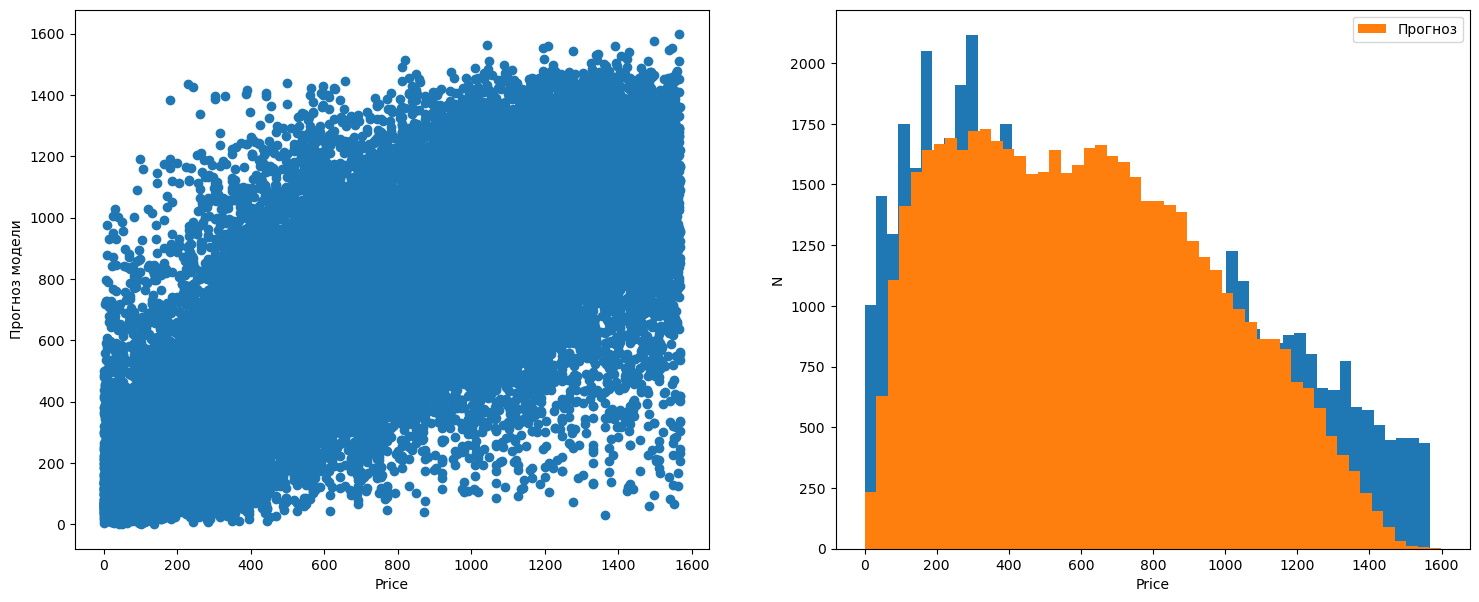

In [23]:
y = power_trans.inverse_transform(y_test.reshape(-1,1))
fig, ax = plt.subplots(1, 2, dpi=100, figsize=(18,7))
ax[0].scatter(y, y_price)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Прогноз модели')

ax[1].hist(y, 50)
ax[1].hist(y_price, 50, label='Прогноз')

ax[1].set_xlabel('Price')
ax[1].set_ylabel('N')
ax[1].legend()

In [26]:
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model, file)